# Input data

Text(0, 0.5, 'Second feature')

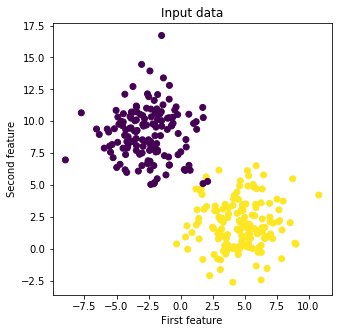

In [2]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X,y = make_blobs(n_samples = 300, random_state = 42, centers = 2, cluster_std = 2)

plt.figure(figsize=(5,5))
plt.title("Input data")
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Train and test separation

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("Shape of train data: {}".format(X_train.shape))
print("Shape of test data: {}".format(X_test.shape))

Shape of train data: (225, 2)
Shape of test data: (75, 2)


# Neural network using Keras

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(units=3, input_dim=2, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid')) 
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


# Neural network training

In [6]:
history = model.fit(X_train, y_train,
                    batch_size=30,
                    epochs=150,
                    validation_data=(X_test, y_test))

Train on 225 samples, validate on 75 samples
Epoch 1/150
225/225 [==============================] - 0s 352us/step - loss: 0.2203 - accuracy: 0.5822 - val_loss: 0.2131 - val_accuracy: 0.6533
Epoch 2/150
225/225 [==============================] - 0s 49us/step - loss: 0.2194 - accuracy: 0.5867 - val_loss: 0.2123 - val_accuracy: 0.6800
Epoch 3/150
225/225 [==============================] - 0s 76us/step - loss: 0.2186 - accuracy: 0.5867 - val_loss: 0.2115 - val_accuracy: 0.6933
Epoch 4/150
225/225 [==============================] - 0s 80us/step - loss: 0.2177 - accuracy: 0.6000 - val_loss: 0.2107 - val_accuracy: 0.6933
Epoch 5/150
225/225 [==============================] - 0s 80us/step - loss: 0.2170 - accuracy: 0.6000 - val_loss: 0.2100 - val_accuracy: 0.6933
Epoch 6/150
225/225 [==============================] - 0s 58us/step - loss: 0.2162 - accuracy: 0.6089 - val_loss: 0.2092 - val_accuracy: 0.7067
Epoch 7/150
225/225 [==============================] - 0s 76us/step - loss: 0.2154 - accur

# Accuracy and loss

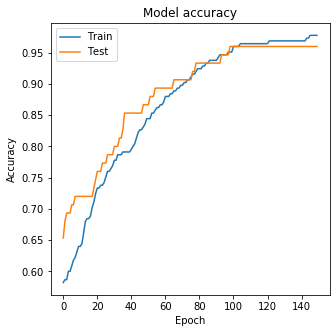

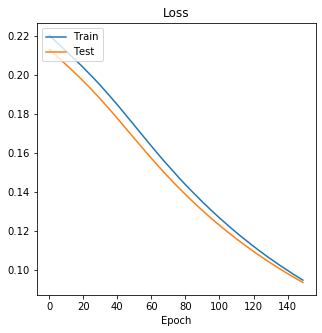

In [7]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure(figsize=(5,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Results

Final accuracy: 0.96


Text(0, 0.5, 'Second feature')

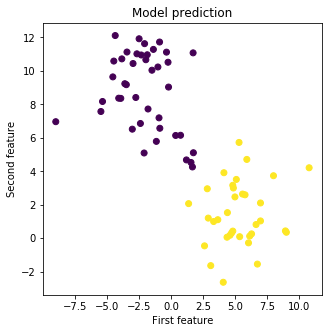

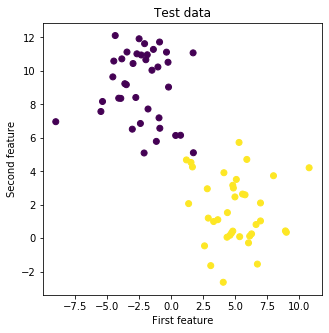

In [17]:
y_pred = model.predict(X_test)
y_classes = y_pred >= 0.5
y_classes = y_classes[:,0]
acc = (y_classes == y_test).mean()
print("Final accuracy: {}".format(acc))

plt.figure(figsize=(5,5))
plt.title("Model prediction")
plt.scatter(X_test[:,0], X_test[:,1], c = y_classes)
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.figure(figsize=(5,5))
plt.title("Test data")
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")